In [1]:
# Diabetes Prediction Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)
df[cols] = df[cols].fillna(df[cols].median())  # Fill NaNs with median

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


--- Logistic Regression ---
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


--- Decision Tree ---
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.59      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154



In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\n--- K-Nearest Neighbors ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


--- K-Nearest Neighbors ---
Accuracy: 0.7337662337662337
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [19]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\n--- Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))



--- Naive Bayes ---
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [20]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n--- Support Vector Machine ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


--- Support Vector Machine ---
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



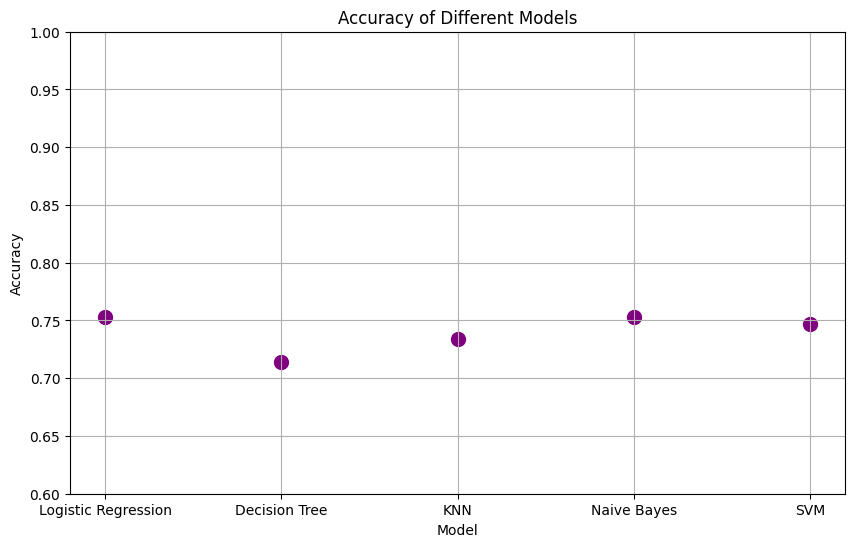

In [21]:
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm)
]

plt.figure(figsize=(10,6))
plt.scatter(model_names, accuracies, color='purple', s=100)
plt.title("Accuracy of Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.show()

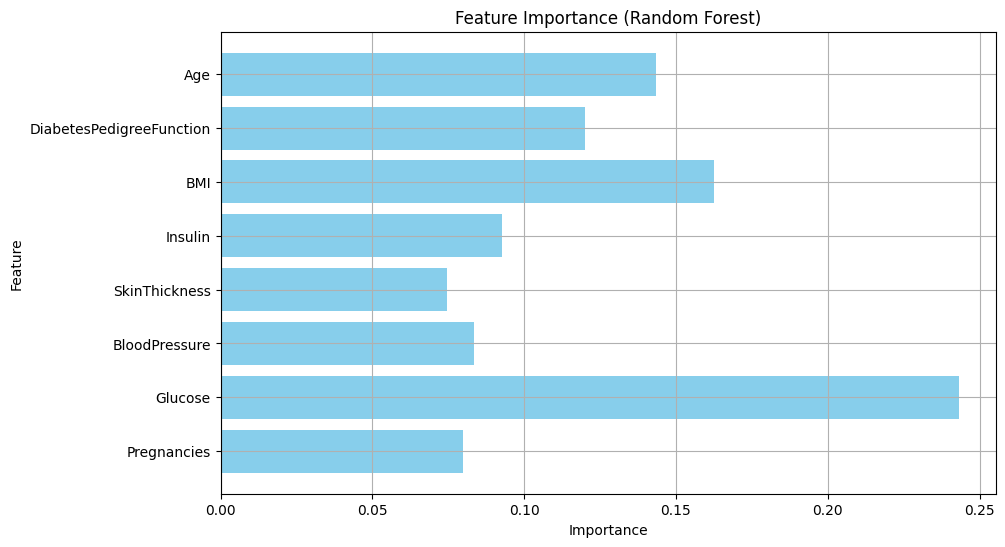

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances, color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

In [14]:
sample = np.array([[2, 100, 70, 20, 80, 30.5, 0.4, 25]])
sample_scaled = scaler.transform(sample)
predicted_class = rf.predict(sample_scaled)
print("\nPrediction for sample input (Random Forest):", "Diabetic" if predicted_class[0] == 1 else "Not Diabetic")


Prediction for sample input (Random Forest): Not Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


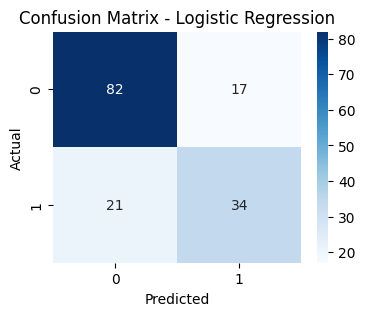

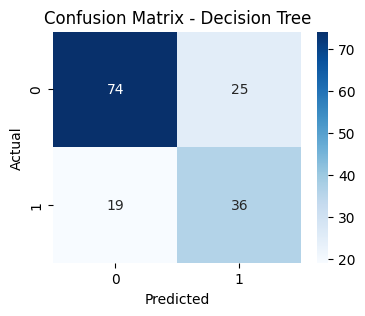

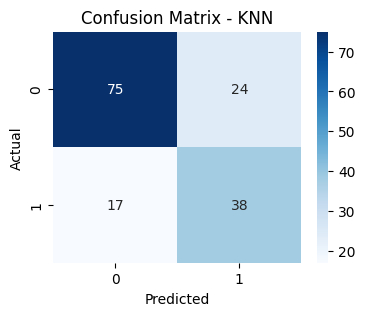

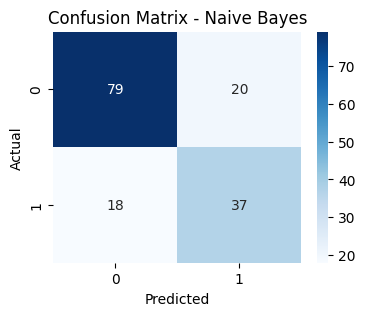

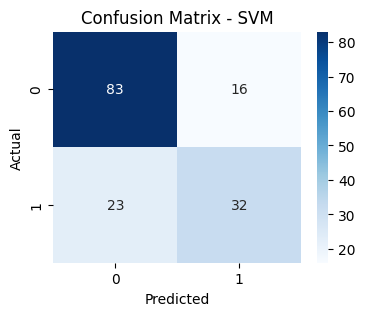

In [23]:
model_preds = [
    ("Logistic Regression", y_pred_lr),
    ("Decision Tree", y_pred_dt),
    ("KNN", y_pred_knn),
    ("Naive Bayes", y_pred_nb),
    ("SVM", y_pred_svm)
]

for name, preds in model_preds:
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
